# Setting up datasets

In [1]:
import pandas as pd
df_baseline = pd.read_csv('../WELFake_Dataset.csv')
df_baseline['all'] = df_baseline['title'] + ' ' + df_baseline['text']
df_baseline

,Unnamed: 0,title,text,label,all
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,NaN,Did they post their votes for Hillary already?,1,NaN
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...


In [13]:
import pandas as pd
df_all_preprocessing = pd.read_csv('../WELFake_Dataset_processed.csv')
df_all_preprocessing

,Unnamed: 0.1,Unnamed: 0,title,text,label,all
0,0,0,law enforc high alert follow threat cop white ...,comment expect barack obama member $hashtag$ $...,1,law enforc high alert follow threat cop white ...
1,1,1,NaN,post vote hillari already?,1,post vote hillari already?
2,2,2,unbelievable! obama attorney general charlott ...,"now, demonstr gather night exercis constitut p...",1,unbelievable! obama attorney general charlott ...
3,3,3,"bobbi jindal, rais hindu, stori christian conv...",dozen polit activ pastor privat dinner friday ...,0,"bobbi jindal, rais hindu, stori christian conv..."
4,4,4,satan : russia unv imag terrifi supernuk weste...,"rs-28 sarmat missile, dub satan , replac ss-18...",1,satan : russia unv imag terrifi supernuk weste...
...,...,...,...,...,...,...
72129,72129,72129,russian steal trump hack u.s. democrat parti,washington (reuters) - hacker believ work russ...,0,russian steal trump hack u.s. democrat parti w...
72130,72130,72130,watch: giuliani demand democrat apolog trump r...,"know, becaus fantasyland republican question c...",1,watch: giuliani demand democrat apolog trump r...
72131,72131,72131,migrant refus leav train refuge camp hungari,migrant refus leav train refuge camp hungari m...,0,migrant refus leav train refuge camp hungari m...
72132,72132,72132,trump tussl unpopular mexican leader much-need...,mexico citi (reuters) - donald trump combat st...,0,trump tussl unpopular mexican leader much-need...


In [12]:
import pandas as pd
df_no_stemming = pd.read_csv('../WELFake_Dataset_processed_no_stemming.csv')
df_no_stemming

,Unnamed: 0.1,Unnamed: 0,title,text,label,all
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment expected Barack Obama Members $HASH...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,1,NaN,Did post votes Hillary already?,1,Did post votes Hillary already?
2,2,2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, demonstrators gathered night exercising c...",1,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...
3,3,3,"Bobby Jindal, raised Hindu, story Christian co...",A dozen politically active pastors private din...,0,"Bobby Jindal, raised Hindu, story Christian co..."
4,4,4,SATAN : Russia unvelis image terrifying SUPERN...,"The RS-28 Sarmat missile, dubbed Satan , repla...",1,SATAN : Russia unvelis image terrifying SUPERN...
...,...,...,...,...,...,...
72129,72129,72129,Russians steal Trump hack U.S. Democratic Party,WASHINGTON (Reuters) - Hackers believed workin...,0,Russians steal Trump hack U.S. Democratic Part...
72130,72130,72130,WATCH: Giuliani Demands That Democrats Apologi...,"You know, fantasyland Republicans questioned c...",1,WATCH: Giuliani Demands That Democrats Apologi...
72131,72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
72132,72132,72132,Trump tussle unpopular Mexican leader much-nee...,MEXICO CITY (Reuters) - Donald Trumps combativ...,0,Trump tussle unpopular Mexican leader much-nee...


In [4]:
import pandas as pd
df_no_stop_word_removal = pd.read_csv('../WELFake_Dataset_processed_no_stop_word_removal.csv')
df_no_stop_word_removal

,Unnamed: 0.1,Unnamed: 0,title,text,label,all
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,1,NaN,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last n...",1,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...
3,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,4,SATAN : Russia unvelis an image of its terrify...,"The RS-28 Sarmat missile, dubbed Satan , will ...",1,SATAN : Russia unvelis an image of its terrify...
...,...,...,...,...,...,...
72129,72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
72130,72130,72130,WATCH: Giuliani Demands That Democrats Apologi...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apologi...
72131,72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
72132,72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trumps combativ...,0,Trump tussle gives unpopular Mexican leader mu...


# Exploring Most Effective Clustering

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
all_vectorizer = TfidfVectorizer()
X_baseline = all_vectorizer.fit_transform(df_baseline['all'].fillna(''))
tfidf_baseline = X_baseline
tfidf_baseline.shape

(72134, 244054)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
all_vectorizer = TfidfVectorizer()
X_all_preprocessing = all_vectorizer.fit_transform(df_all_preprocessing['all'])
tfidf_all_preprocessing = X_all_preprocessing
tfidf_all_preprocessing.shape

(72134, 195835)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
all_vectorizer = TfidfVectorizer()
X_no_stemming = all_vectorizer.fit_transform(df_no_stemming['all'])
tfidf_no_stemming = X_no_stemming
tfidf_no_stemming.shape

(72134, 206481)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
all_vectorizer = TfidfVectorizer()
X_no_stop_word_removal = all_vectorizer.fit_transform(df_no_stop_word_removal['all'])
tfidf_no_stop_word_removal = X_no_stop_word_removal
tfidf_no_stop_word_removal.shape

(72134, 206485)

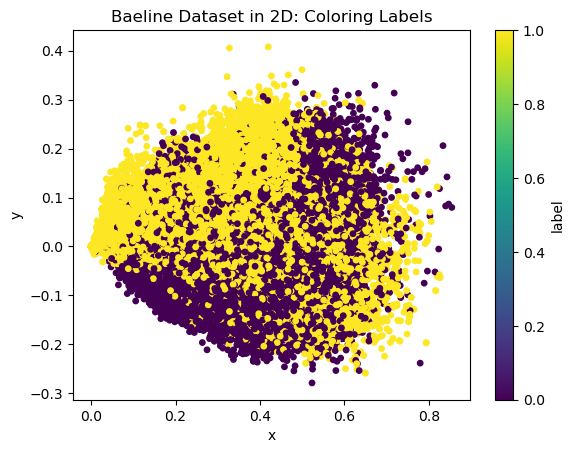

In [37]:
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
%matplotlib inline

clustered = KMeans(n_clusters=2, random_state=0, n_init="auto").fit_predict(tfidf_baseline)
lsa = TruncatedSVD(n_components=2)
df2d_baseline = pd.DataFrame(lsa.fit_transform(tfidf_baseline), columns=list('xy'))
df2d_baseline['label'] = df_baseline['label']
df2d_baseline['cluster'] = clustered
df2d_baseline.plot.scatter(x='x', y='y', c='label',cmap="viridis", s=15)
plt.title("Baeline Dataset in 2D: Coloring Labels")

plt.show()

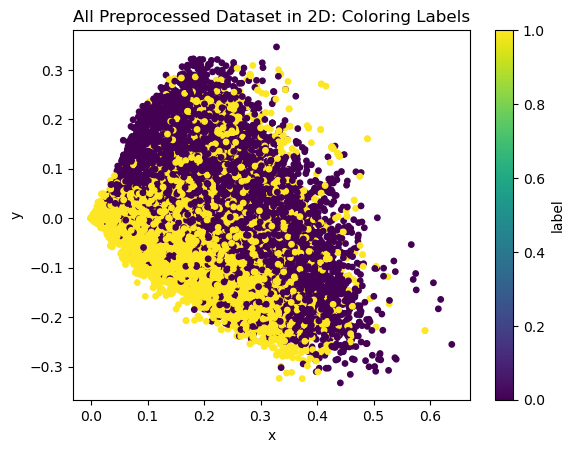

In [21]:
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
%matplotlib inline

clustered = KMeans(n_clusters=2, random_state=0, n_init="auto").fit_predict(tfidf_all_preprocessing)
lsa = TruncatedSVD(n_components=2)
df2d_all_preprocessing = pd.DataFrame(lsa.fit_transform(tfidf_all_preprocessing), columns=list('xy'))
df2d_all_preprocessing['label'] = df_all_preprocessing['label']
df2d_all_preprocessing['cluster'] = clustered
df2d_all_preprocessing.plot.scatter(x='x', y='y', c='label',cmap="viridis", s=15)
plt.title("All Preprocessed Dataset in 2D: Coloring Labels")

plt.show()

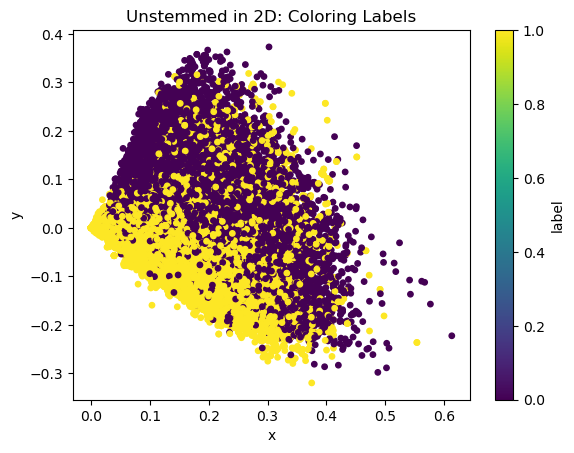

In [25]:
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
%matplotlib inline

clustered = KMeans(n_clusters=2, random_state=0, n_init="auto").fit_predict(tfidf_no_stemming)
lsa = TruncatedSVD(n_components=2)
df2d_no_stemming = pd.DataFrame(lsa.fit_transform(tfidf_no_stemming), columns=list('xy'))
df2d_no_stemming ['label'] = df_no_stemming['label']
df2d_no_stemming ['cluster'] = clustered
df2d_no_stemming .plot.scatter(x='x', y='y', c='label',cmap="viridis", s=15)
plt.title("Unstemmed in 2D: Coloring Labels")

plt.show()

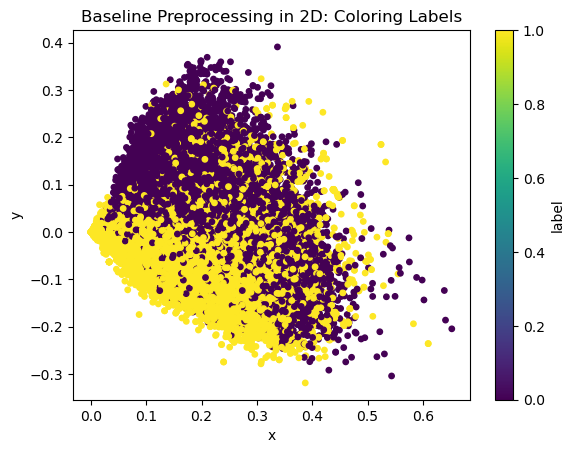

In [22]:
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
%matplotlib inline

clustered = KMeans(n_clusters=2, random_state=0, n_init="auto").fit_predict(tfidf_no_stop_word_removal)
lsa = TruncatedSVD(n_components=2)
df2d_no_stop_word_removal = pd.DataFrame(lsa.fit_transform(tfidf_no_stop_word_removal), columns=list('xy'))
df2d_no_stop_word_removal['label'] = df_no_stop_word_removal['label']
df2d_no_stop_word_removal['cluster'] = clustered
df2d_no_stop_word_removal.plot.scatter(x='x', y='y', c='label',cmap="viridis", s=15)
plt.title("Just Tokens in 2D: Coloring Labels")

plt.show()

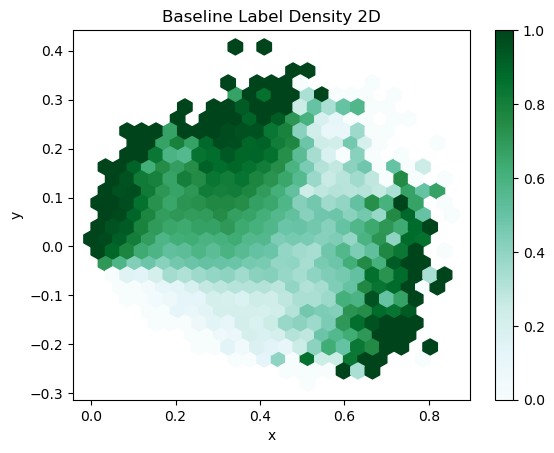

In [39]:
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d_baseline.plot.hexbin(x='x', y='y',C='label', gridsize=25)
plt.title("Baseline Label Density 2D")
plt.show()

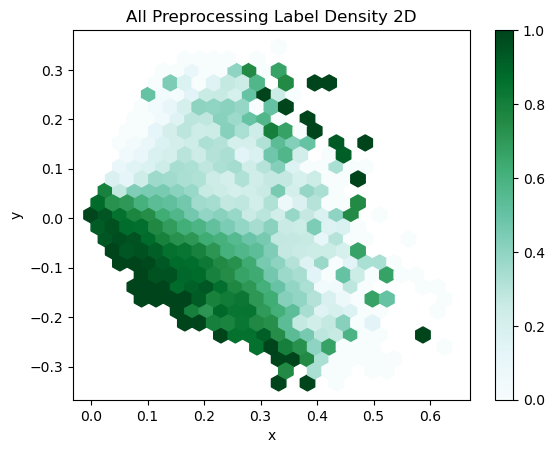

In [23]:
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d_all_preprocessing.plot.hexbin(x='x', y='y',C='label', gridsize=25)
plt.title("All Preprocessing Label Density 2D")
plt.show()

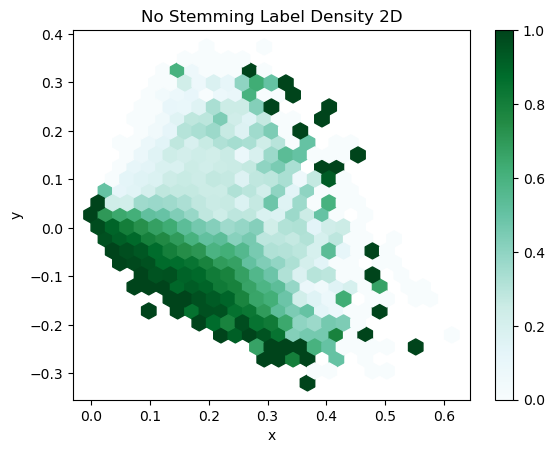

In [26]:
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d_no_stemming.plot.hexbin(x='x', y='y',C='label', gridsize=25)
plt.title("No Stemming Label Density 2D")
plt.show()

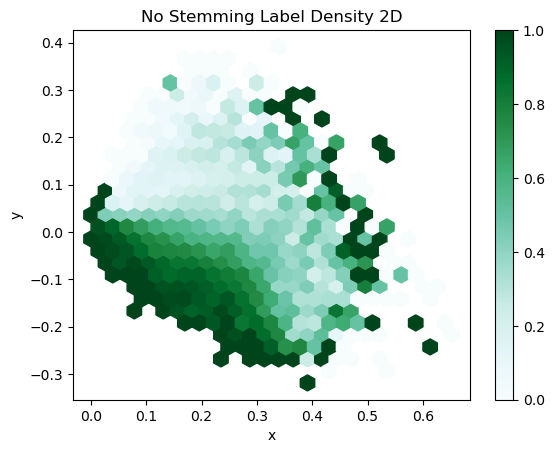

In [27]:
%matplotlib inline

# Plot Data Visualization (Matplotlib)
df2d_no_stop_word_removal.plot.hexbin(x='x', y='y',C='label', gridsize=25)
plt.title("No Stop Words Label Density 2D")
plt.show()

In [6]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline

def bench_clustering(cluster, name, data, labels, unique_reporting, reducer = None, sum_variance=True):
    """Benchmark to evaluate various clustering strategies and initialization methods.

    Parameters
    ----------
    cluster : SciKit Learn Clustering Algorithm
        A :class:`~sklearn.cluster.*` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(cluster).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, unique_reporting(estimator[-1])]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.accuracy_score,
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    if sum_variance:
        results += [
                reducer.explained_variance_ratio_.sum() * 100
        ]
    else:
        results += [
                -1
        ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t\t{:.1f}%"
    )
    print(formatter_result.format(*results))

In [22]:
print("Comparison of Unreduced clustering")
print(92 * "_")
print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init=10)
kmeans_b = KMeans(init="random", n_clusters=2, n_init=10)
bench_clustering(cluster=kmeans_a, name="Baseline-1", data=tfidf_baseline, labels=df_baseline['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)
bench_clustering(cluster=kmeans_b, name="Baseline-2", data=tfidf_baseline, labels=df_baseline['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init=10)
kmeans_b = KMeans(init="random", n_clusters=2, n_init=10)
bench_clustering(cluster=kmeans_a, name="JustTokens-1", data=tfidf_no_stop_word_removal, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)
bench_clustering(cluster=kmeans_b, name="JustTokens-2", data=tfidf_no_stop_word_removal, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init=10)
kmeans_b = KMeans(init="random", n_clusters=2, n_init=10)
bench_clustering(cluster=kmeans_a, name="NoStemm-1", data=tfidf_no_stemming, labels=df_no_stemming['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)
bench_clustering(cluster=kmeans_b, name="NoStemm-2", data=tfidf_no_stemming, labels=df_no_stemming['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init=10)
kmeans_b = KMeans(init="random", n_clusters=2, n_init=10)
bench_clustering(cluster=kmeans_a, name="AllPrepro-1", data=tfidf_all_preprocessing, labels=df_all_preprocessing['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)
bench_clustering(cluster=kmeans_b, name="AllPrepro-2", data=tfidf_all_preprocessing, labels=df_all_preprocessing['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

Comparison of Unreduced clustering
____________________________________________________________________________________________
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
Baseline-1	24.847s	62433	0.469	0.003	0.003	0.004	0.003	0.013		-1.0%
Baseline-2	13.614s	62433	0.468	0.003	0.003	0.004	0.003	0.019		-1.0%
JustTokens-1	24.797s	62837	0.462	0.004	0.004	0.006	0.004	0.015		-1.0%
JustTokens-2	16.197s	62837	0.462	0.004	0.004	0.006	0.004	0.016		-1.0%
NoStemm-1	17.259s	69989	0.450	0.011	0.013	0.010	0.012	0.004		-1.0%
NoStemm-2	11.621s	69989	0.451	0.011	0.012	0.009	0.011	0.004		-1.0%
AllPrepro-1	16.484s	69711	0.536	0.006	0.007	0.005	0.006	0.006		-1.0%
AllPrepro-2	9.458s	69711	0.464	0.006	0.007	0.005	0.007	0.005		-1.0%


In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# Grid search over TF-IDF Params
param_grid = ParameterGrid({
    'min_df':[.1, .01, .001],
    'max_df':[.95],
})
for param in param_grid:
    min_df = param['min_df']
    max_df = param['max_df']
    if (min_df == max_df):
        continue
    vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, lowercase=True)

    print(92 * "_")
    print(f"Parameters: min-df:{min_df}, max-df:{max_df}")
    print(92 * "_")
    print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")

    t0 = time()
    baseline_data = vectorizer.fit_transform(df_baseline['all'].fillna(''))
    baseline_fit_time = time() - t0

    kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    bench_clustering(cluster=kmeans_a, name="Baseline", data=baseline_data, labels=df_baseline['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

    t0 = time()
    no_stopword_data = vectorizer.fit_transform(df_no_stop_word_removal['all'])
    no_stopword_fit_time = time() - t0

    kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    bench_clustering(cluster=kmeans_a, name="JustTokens", data=no_stopword_data, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

    # t0 = time()
    # no_stemming_data = vectorizer.fit_transform(df_no_stemming['all'])
    # no_stemming_fit_time = time() - t0

    # kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    # bench_clustering(cluster=kmeans_a, name="NoStemm", data=no_stemming_data, labels=df_no_stemming['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

    # t0 = time()
    # all_prepro_data = vectorizer.fit_transform(df_all_preprocessing['all'])
    # all_prepro_fit_time = time() - t0

    # kmeans_a = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    # bench_clustering(cluster=kmeans_a, name="AllPrepro", data=all_prepro_data, labels=df_all_preprocessing['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

    print(92 * "_")
    print("Fit Times:")
    print("base\tnoStop\tnoStem\tallPrepo")
    formatter = (
        "{:.3f}s\t{:.3f}s"
    )
    print(formatter.format(baseline_fit_time, no_stopword_fit_time))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import MiniBatchNMF, LatentDirichletAllocation

# Testing effect of reductions on KMeans
print("PCA Reduction - Baseline Dataset")
all_vectorizer = TfidfVectorizer()
subset_vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_baseline_all = all_vectorizer.fit_transform(df_baseline['all'].fillna(''))
X_baseline_subset = subset_vectorizer.fit_transform(df_baseline['all'].fillna(''))
print(f"Vectorizing from all features: {X_baseline_all.shape}")
print(f"Vectorizing from only selected features: {X_baseline_subset.shape}")
print(92 * "_")
print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
lsa_sizes = [2, 10, 100, 500, 1000]

for size in lsa_sizes:
    pca = make_pipeline(TruncatedSVD(n_components=size), Normalizer(copy=False))
    pca_data_1 = pca.fit_transform(X_baseline_all)
    kmeans = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"all-{size}", data=pca_data_1, labels=df_baseline['label'], unique_reporting=lambda x: x.inertia_)
    
    pca_data_2 = pca.fit_transform(X_baseline_subset)
    kmeans = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"subset-{size}", data=pca_data_2, labels=df_baseline['label'], unique_reporting=lambda x: x.inertia_)

PCA Reduction - Baseline Dataset
Vectorizing from all features: (72134, 244054)
Vectorizing from only selected features: (72134, 3945)
____________________________________________________________________________________________
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
all-2    	0.063s	2550	0.630	0.055	0.057	0.067	0.056	0.529		2.9%
subset-2 	0.018s	3734	0.638	0.057	0.058	0.076	0.058	0.562		2.6%
all-10   	0.036s	16108	0.346	0.075	0.078	0.094	0.077	0.163		6.5%
subset-10	0.034s	27422	0.254	0.183	0.184	0.242	0.184	0.144		8.8%
all-100  	0.124s	36879	0.530	0.003	0.003	0.004	0.003	0.087		17.5%
subset-100	0.156s	51100	0.710	0.131	0.131	0.176	0.131	0.050		26.4%
all-500  	0.889s	48794	0.530	0.002	0.002	0.003	0.002	0.063		32.8%
subset-500	1.012s	60070	0.455	0.010	0.011	0.008	0.010	0.011		51.0%
all-1000 	1.512s	52908	0.512	0.000	0.000	0.001	0.000	0.046		42.4%
subset-1000	1.829s	62448	0.616	0.042	0.042	0.054	0.042	0.015		66.7%


In [ ]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import MiniBatchNMF, LatentDirichletAllocation

# Testing effect of reductions on KMeans
print("PCA Reduction - All Preprocessing")
print(92 * "_")
print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
all_vectorizer = TfidfVectorizer(min_df=.1, max_df=.75)
X_all_preprocessing = all_vectorizer.fit_transform(df_all_preprocessing['all'].fillna(''))
lsa_sizes = [2, 10, 100, 500, 1000]

for size in lsa_sizes:
    pca = make_pipeline(TruncatedSVD(n_components=size), Normalizer(copy=False))
    pca_data = pca.fit_transform(X_all_preprocessing)
    kmeans = KMeans(init="k-means++", n_clusters=2, n_init=1)
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"k++-{size}", data=pca_data, labels=df_all_preprocessing['label'], unique_reporting=lambda x: x.inertia_)

    kmeans = KMeans(init="random", n_clusters=2, n_init=1, random_state=0)
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"random-{size}", data=pca_data, labels=df_all_preprocessing['label'], unique_reporting=lambda x: x.inertia_)

    if (size == 2):
        kmeans = KMeans(init=pca.fit_transform(pca[0].components_), n_clusters=2, n_init=1)
        bench_clustering(cluster=kmeans, reducer=pca[0], name=f"PCA-{size}", data=pca_data, labels=df_all_preprocessing['label'], unique_reporting=lambda x: x.inertia_)

PCA Reduction - Stemmed Dataset
____________________________________________________________________________________________
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
k++-2    	0.034s	3705	0.632	0.053	0.054	0.069	0.053	0.647		1.4%
random-2 	0.033s	3705	0.369	0.053	0.054	0.069	0.053	0.626		1.4%
PCA-2    	0.030s	3705	0.368	0.053	0.054	0.069	0.053	0.606		100.0%
k++-10   	0.055s	32258	0.418	0.021	0.021	0.027	0.021	0.153		5.2%
random-10	0.048s	32258	0.415	0.022	0.022	0.029	0.022	0.166		5.2%
k++-100  	0.146s	57440	0.411	0.029	0.031	0.032	0.030	0.036		17.1%
random-100	0.183s	57440	0.411	0.029	0.031	0.032	0.030	0.026		17.1%
k++-500  	1.028s	64987	0.576	0.022	0.025	0.023	0.024	0.015		33.9%
random-500	0.837s	64987	0.424	0.023	0.025	0.023	0.024	0.015		33.9%
k++-1000 	2.468s	66790	0.567	0.018	0.020	0.018	0.019	0.012		44.6%
random-1000	1.784s	66790	0.432	0.018	0.021	0.018	0.019	0.013		44.6%


In [ ]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import MiniBatchNMF, LatentDirichletAllocation

# Testing effect of reductions on KMeans
print("PCA Reduction - Non Stemmed Dataset")
print(92 * "_")
print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
all_vectorizer = TfidfVectorizer(min_df=.1, max_df=.75)
X_no_stemming = all_vectorizer.fit_transform(df_no_stemming['all'].fillna(''))
lsa_sizes = [2, 10, 100, 500, 1000]

for size in lsa_sizes:
    pca = make_pipeline(TruncatedSVD(n_components=size), Normalizer(copy=False))
    pca_data = pca.fit_transform(X_no_stemming)
    kmeans = KMeans(init="k-means++", n_clusters=2, n_init=1)
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"k++-{size}", data=pca_data, labels=df_no_stemming['label'], unique_reporting=lambda x: x.inertia_)

    kmeans = KMeans(init="random", n_clusters=2, n_init=1, random_state=0)
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"random-{size}", data=pca_data, labels=df_no_stemming['label'], unique_reporting=lambda x: x.inertia_)

    if (size == 2):
        kmeans = KMeans(init=pca.fit_transform(pca[0].components_), n_clusters=2, n_init=1)
        bench_clustering(cluster=kmeans, reducer=pca[0], name=f"PCA-{size}", data=pca_data, labels=df_no_stemming['label'], unique_reporting=lambda x: x.inertia_)

PCA Reduction - Non Stemmed Dataset
____________________________________________________________________________________________
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
k++-2    	0.029s	4214	0.672	0.089	0.089	0.119	0.089	0.609		1.2%
random-2 	0.030s	4214	0.328	0.089	0.089	0.118	0.089	0.613		1.2%
PCA-2    	0.032s	4214	0.328	0.089	0.089	0.119	0.089	0.592		100.0%
k++-10   	0.042s	32936	0.595	0.028	0.029	0.036	0.028	0.162		4.6%
random-10	0.054s	32937	0.401	0.031	0.031	0.039	0.031	0.161		4.6%
k++-100  	0.160s	57860	0.396	0.040	0.043	0.043	0.041	0.032		15.3%
random-100	0.200s	57860	0.396	0.040	0.044	0.043	0.042	0.038		15.3%
k++-500  	0.919s	65372	0.592	0.033	0.037	0.034	0.035	0.011		30.7%
random-500	0.898s	65372	0.407	0.033	0.037	0.034	0.035	0.010		30.7%
k++-1000 	2.036s	67126	0.583	0.027	0.030	0.027	0.029	0.010		40.5%
random-1000	1.873s	67126	0.417	0.027	0.030	0.027	0.029	0.009		40.5%


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Testing effect of reductions on KMeans
print("PCA Reduction - Just Tokenized Dataset")
all_vectorizer = TfidfVectorizer()
subset_vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_just_tokenize_all = all_vectorizer.fit_transform(df_no_stop_word_removal['all'].fillna(''))
X_just_tokenize_subset = subset_vectorizer.fit_transform(df_no_stop_word_removal['all'].fillna(''))
print(f"Vectorizing from all features: {X_just_tokenize_all.shape}")
print(f"Vectorizing from only selected features: {X_just_tokenize_subset.shape}")
print(92 * "_")
print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
lsa_sizes = [2, 10, 100, 500, 1000]

for size in lsa_sizes:
    pca = make_pipeline(TruncatedSVD(n_components=size), Normalizer(copy=False))
    pca_data_1 = pca.fit_transform(X_just_tokenize_all)
    kmeans = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"all-{size}", data=pca_data_1, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_)
    
    pca_data_2 = pca.fit_transform(X_just_tokenize_subset)
    kmeans = KMeans(init="k-means++", n_clusters=2, n_init='auto')
    bench_clustering(cluster=kmeans, reducer=pca[0], name=f"subset-{size}", data=pca_data_2, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_)

PCA Reduction - Just Tokenized Dataset
Vectorizing from all features: (72134, 206485)
Vectorizing from only selected features: (72134, 3907)
____________________________________________________________________________________________
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
all-2    	0.048s	2166	0.662	0.088	0.092	0.105	0.090	0.560		2.8%
subset-2 	0.017s	3561	0.707	0.127	0.127	0.171	0.127	0.592		2.5%
all-10   	0.031s	16100	0.682	0.109	0.114	0.132	0.112	0.179		6.4%
subset-10	0.028s	27396	0.233	0.217	0.218	0.284	0.218	0.154		8.6%
all-100  	0.194s	37049	0.549	0.008	0.009	0.010	0.008	0.084		17.4%
subset-100	0.141s	51716	0.737	0.169	0.169	0.225	0.169	0.046		26.2%
all-500  	0.737s	49042	0.515	0.000	0.000	0.001	0.000	0.068		32.7%
subset-500	0.805s	60638	0.658	0.076	0.076	0.100	0.076	0.017		50.9%
all-1000 	1.728s	53194	0.498	0.000	0.000	-0.000	0.000	0.042		42.3%
subset-1000	1.936s	63073	0.367	0.054	0.055	0.071	0.054	0.014		66.6%


In [17]:
# Our final LSA Model
print("Testing our best LSA clustering model")
dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)

lsa = make_pipeline(TruncatedSVD(n_components=10), Normalizer(copy=False))
data = lsa.fit_transform(X_tfidf)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init='auto')

print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
bench_clustering(cluster=kmeans, reducer=lsa[0], name="best", data=data, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_)

clusters = kmeans.fit_predict(data)

graphing_lsa = TruncatedSVD(n_components=2)
df2d_just_tokens = pd.DataFrame(graphing_lsa.fit_transform(X_tfidf), columns=list('xy'))
df2d_just_tokens['label'] = df_no_stop_word_removal['label']
df2d_just_tokens['cluster'] = clusters

Testing our best LSA clustering model
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
best     	0.033s	27398	0.767	0.217	0.219	0.284	0.218	0.160		8.6%


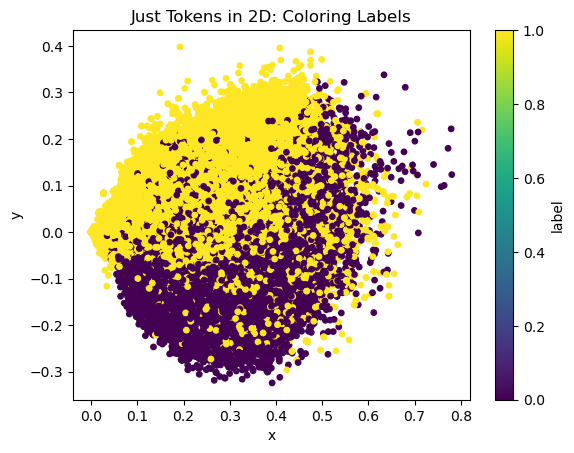

In [15]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

df2d_just_tokens.plot.scatter(x='x', y='y', c='label',cmap="viridis", s=15)
plt.title("Just Tokens in 2D: Coloring Labels")
plt.show()

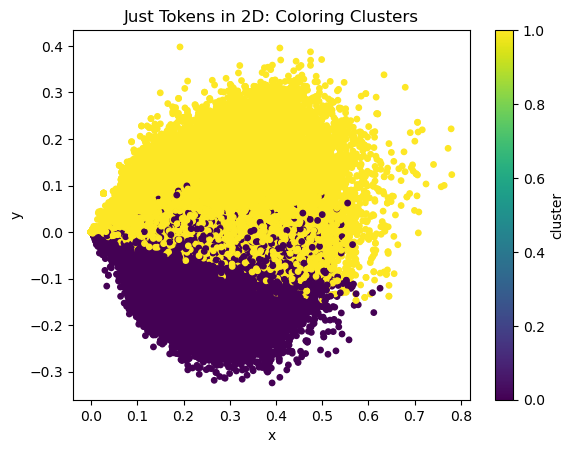

In [16]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

df2d_just_tokens.plot.scatter(x='x', y='y', c='cluster',cmap="viridis", s=15)
plt.title("Just Tokens in 2D: Coloring Clusters")
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import MiniBatchNMF, LatentDirichletAllocation
from sklearn.cluster import KMeans

# No that we have found our best clustering setup with KMeans, let's compare its effectiveness to NMF and LDA
# First lets see how KMeans runs when seeded with the NMF Components

nmf_sizes = [2]
dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)
init = "nndsvda"

print(92 * "_")
print("NMF Reduction")
print(92 * "_")
print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
for size in nmf_sizes:
    mbnmf_1 = MiniBatchNMF(
        n_components=size,
        random_state=1,
        batch_size=128,
        init=init,
        beta_loss="frobenius",
        l1_ratio=0.5,
    )
    nmf_data = mbnmf_1.fit_transform(X_tfidf)
    kmeans = KMeans(init=mbnmf_1.components_, n_clusters=2, n_init=1)
    bench_clustering(cluster=kmeans, name=f"mbnf-1", data=X_tfidf, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

    mbnmf_2 = MiniBatchNMF(
        n_components=size,
        random_state=1,
        batch_size=128,
        init=init,
        beta_loss="kullback-leibler",
        l1_ratio=0.5,
    )
    nmf_data = mbnmf_2.fit_transform(X_tfidf)
    kmeans = KMeans(init=mbnmf_2.components_, n_clusters=2, n_init=1)
    bench_clustering(cluster=kmeans, name=f"mbnf-2", data=X_tfidf, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

# Testing effect of LDA on KMeans
count_vectorizer = CountVectorizer(min_df=.01, max_df=.75)
X_counts = count_vectorizer.fit_transform(dataset)
lda_sizes = [2]
for size in lda_sizes:
    lda = LatentDirichletAllocation(
        n_components=size,
        max_iter=5,
        learning_method="online",
        learning_offset=50.0,
        random_state=0,
    )
    lda_data = lda.fit_transform(X_counts)
    kmeans = KMeans(init=lda.components_, n_clusters=2, n_init=1)
    bench_clustering(cluster=kmeans, name=f"lda", data=X_tfidf, labels=df_no_stop_word_removal['label'], unique_reporting=lambda x: x.inertia_, sum_variance=False)

____________________________________________________________________________________________
NMF Reduction
____________________________________________________________________________________________
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
mbnf-1   	0.708s	65820	0.393	0.036	0.037	0.046	0.037	0.006		-1.0%
mbnf-2   	0.540s	65820	0.393	0.036	0.037	0.045	0.037	0.008		-1.0%
lda      	0.498s	65820	0.608	0.037	0.038	0.047	0.038	0.006		-1.0%


In [34]:
from time import time
from sklearn import metrics
import numpy as np

def bench_soft_clustering(soft_cluster, data, name, labels):
    t0 = time()
    estimations = soft_cluster.fit_transform(data)
    fit_time = time() - t0
    results = [name, fit_time]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.accuracy_score,
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, np.argmax(estimations, axis=1)) for m in clustering_metrics]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import MiniBatchNMF

# So we can see that seeding KMeans using our two above methods actually does nothing
# Lets try instead to directly use them as clustering methods, starting with NMF

nmf_sizes = [2]
dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)
init = "nndsvda"

mbnmf_1 = MiniBatchNMF(
    n_components=size,
    random_state=1,
    batch_size=128,
    init=init,
    beta_loss="frobenius",
    l1_ratio=0.5,
)

mbnmf_2 = MiniBatchNMF(
    n_components=size,
    random_state=1,
    batch_size=128,
    init=init,
    beta_loss="kullback-leibler",
    l1_ratio=0.5,
)

print(92 * "_")
print("NMF")
print(92 * "_")
print("init\t\ttime\tacc\thomo\tcompl\tARI\tAMI")
bench_soft_clustering(mbnmf_1, X_tfidf, "Frob.", df_no_stop_word_removal['label'])
bench_soft_clustering(mbnmf_2, X_tfidf, "KB-L", df_no_stop_word_removal['label'])

____________________________________________________________________________________________
NMF
____________________________________________________________________________________________
init		time	acc	homo	compl	ARI	AMI
Frob.    	3.487s	0	0.054	0.105	0.036	0.071
KB-L     	14.412s	0	0.109	0.148	0.102	0.126


NMF Accuracy: 0.6588016746610474


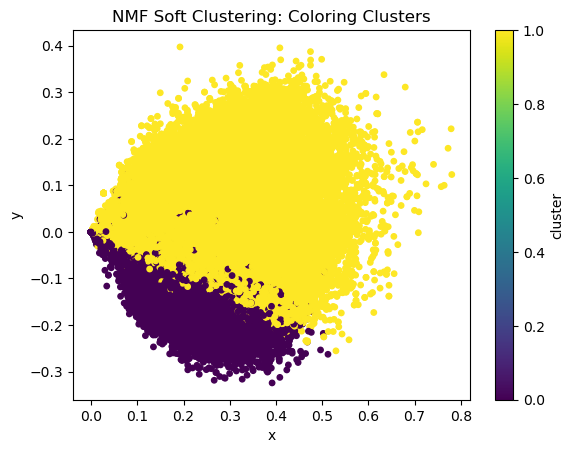

In [69]:
# Examining our best NMF model more closely

dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)
init = "nndsvda"

mbnmf_2 = MiniBatchNMF(
    n_components=size,
    random_state=1,
    batch_size=128,
    init=init,
    beta_loss="kullback-leibler",
    l1_ratio=0.5,
)

estimations_nmf = mbnmf_2.fit_transform(X_tfidf)

graphing_lsa = TruncatedSVD(n_components=2)
df2d_nmf = pd.DataFrame(graphing_lsa.fit_transform(X_tfidf), columns=list('xy'))
df2d_nmf['label'] = df_no_stop_word_removal['label']

# When we take the Argmax our prediction is inverted (i.e. the 0 component being max corresponds to a prediction of 1) (why?)
# So we can simply just take the argmin
df2d_nmf['cluster'] = np.argmin(estimations_nmf, axis=1)
print(f"NMF Accuracy: {metrics.accuracy_score(df2d_nmf['label'], df2d_nmf['cluster'])}")

from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

df2d_nmf.plot.scatter(x='x', y='y', c='cluster',cmap="viridis", s=15)
plt.title("NMF Soft Clustering: Coloring Clusters")
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# So we can see that seeding KMeans using our two above methods actually does nothing
# Lets try instead to directly use them as clustering methods, starting with NMF

nmf_sizes = [2]
dataset = df_no_stop_word_removal['all']
count_vectorizer = CountVectorizer(min_df=.01, max_df=.75)
X_counts = count_vectorizer.fit_transform(dataset)

lda = LatentDirichletAllocation(
    n_components=2,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

print(92 * "_")
print("LDA")
print(92 * "_")
print("init\t\ttime\tacc\thomo\tcompl\tARI\tAMI")
bench_soft_clustering(lda, X_counts, "LDA", df_no_stop_word_removal['label'])

____________________________________________________________________________________________
LDA
____________________________________________________________________________________________
init		time	acc	homo	compl	ARI	AMI
LDA      	277.401s	0	0.196	0.196	0.260	0.196


In [48]:
# The LDA results are pretty good, lets see what they look like
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# So we can see that seeding KMeans using our two above methods actually does nothing
# Lets try instead to directly use them as clustering methods, starting with NMF
dataset = df_no_stop_word_removal['all']
count_vectorizer = CountVectorizer(min_df=.01, max_df=.75)
X_counts = count_vectorizer.fit_transform(dataset)

lda = LatentDirichletAllocation(
    n_components=2,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

estimations = lda.fit_transform(X_counts)
clusters = np.argmax(estimations, axis=1)

graphing_lsa = TruncatedSVD(n_components=2)
df2d_just_tokens = pd.DataFrame(graphing_lsa.fit_transform(X_tfidf), columns=list('xy'))
df2d_just_tokens['label'] = df_no_stop_word_removal['label']


LDA Accuracy: 0.7537083760778551


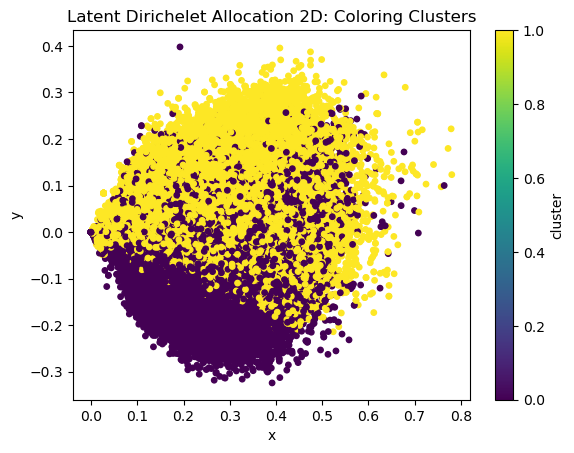

In [70]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

# When we take the Argmax our prediction is inverted (i.e. the 0 component being max corresponds to a prediction of 1) (why?)
# So we can simply just take the argmin
df2d_just_tokens['cluster'] = np.argmin(estimations, axis=1)
df2d_just_tokens.plot.scatter(x='x', y='y', c='cluster',cmap="viridis", s=15)
print(f"LDA Accuracy: {metrics.accuracy_score(df2d_just_tokens['label'], df2d_just_tokens['cluster'])}")
plt.title("Latent Dirichelet Allocation 2D: Coloring Clusters")
plt.show()

# Topic Modeling
Now that we have evaluated our clustering performance on 2 clusters, let us try and generalize our approach to Topic Modeling

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Our final LSA Model
print("Testing LSA clustering model on various cluster sizes")
dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)

lsa = make_pipeline(TruncatedSVD(n_components=10), Normalizer(copy=False))
data = lsa.fit_transform(X_tfidf)

cluster_sizes = range(2, 32)
intertias = []

def report_intertia(x):
    intertia = x.inertia_
    intertias.append(intertia)
    return intertia

print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
for size in cluster_sizes:
    kmeans = KMeans(init="k-means++", n_clusters=size, n_init='auto')
    bench_clustering(cluster=kmeans, reducer=lsa[0], name=f"{size}", data=data, labels=df_no_stop_word_removal['label'], unique_reporting=report_intertia)

Testing LSA clustering model on various cluster sizes
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
2        	0.068s	27371	0.233	0.217	0.219	0.285	0.218	0.131		8.6%
3        	0.047s	24342	0.307	0.197	0.124	0.174	0.153	0.144		8.6%
4        	0.048s	22018	0.093	0.198	0.103	0.155	0.135	0.169		8.6%
5        	0.061s	19935	0.371	0.181	0.080	0.096	0.111	0.163		8.6%
6        	0.063s	18345	0.185	0.198	0.078	0.090	0.112	0.186		8.6%
7        	0.081s	17218	0.074	0.188	0.072	0.077	0.104	0.183		8.6%
8        	0.074s	15742	0.185	0.205	0.072	0.072	0.106	0.189		8.6%
9        	0.068s	14687	0.209	0.221	0.074	0.070	0.111	0.206		8.6%
10       	0.100s	14087	0.055	0.247	0.078	0.072	0.119	0.225		8.6%
11       	0.078s	13227	0.083	0.222	0.068	0.060	0.104	0.210		8.6%
12       	0.143s	12694	0.072	0.258	0.075	0.066	0.116	0.217		8.6%
13       	0.097s	12328	0.197	0.229	0.064	0.051	0.100	0.185		8.6%
14       	0.108s	11919	0.112	0.281	0.075	0.054	0.119	0.206		8.6%
15       	0.123s	11540	0.043	0.291	0.076	0.0

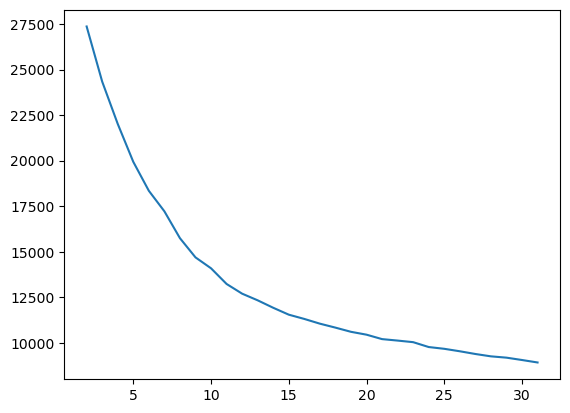

In [21]:
from matplotlib import pyplot as plt

plt.plot(cluster_sizes, intertias)
plt.show()

In [22]:
# Lets see if increasing the number of components makes a big difference
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Our final LSA Model
print("Testing LSA clustering model on various cluster sizes")
dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)

lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
data = lsa.fit_transform(X_tfidf)

cluster_sizes = range(2, 32)
intertias = []

def report_intertia(x):
    intertia = x.inertia_
    intertias.append(intertia)
    return intertia

print("init\t\ttime\tinertia\tacc\thomo\tcompl\tARI\tAMI\tsilhouette\tEVR")
for size in cluster_sizes:
    kmeans = KMeans(init="k-means++", n_clusters=size, n_init='auto')
    bench_clustering(cluster=kmeans, reducer=lsa[0], name=f"{size}", data=data, labels=df_no_stop_word_removal['label'], unique_reporting=report_intertia)

Testing LSA clustering model on various cluster sizes
init		time	inertia	acc	homo	compl	ARI	AMI	silhouette	EVR
2        	0.143s	51704	0.262	0.170	0.170	0.226	0.170	0.053		26.2%
3        	0.239s	50192	0.303	0.143	0.091	0.133	0.111	0.026		26.2%
4        	0.269s	49224	0.203	0.188	0.096	0.141	0.127	0.036		26.2%
5        	0.218s	48067	0.101	0.166	0.075	0.102	0.103	0.024		26.2%
6        	0.240s	47626	0.082	0.153	0.062	0.075	0.088	0.037		26.2%
7        	0.245s	46820	0.279	0.200	0.075	0.078	0.109	0.039		26.2%
8        	0.346s	46001	0.050	0.223	0.075	0.072	0.113	0.042		26.2%
9        	0.334s	45328	0.012	0.211	0.069	0.064	0.104	0.047		26.2%
10       	0.337s	44689	0.132	0.245	0.078	0.064	0.118	0.050		26.2%
11       	0.320s	44082	0.035	0.202	0.063	0.056	0.096	0.061		26.2%
12       	0.399s	43428	0.095	0.233	0.069	0.055	0.106	0.054		26.2%
13       	0.299s	42919	0.036	0.223	0.064	0.056	0.099	0.063		26.2%
14       	0.358s	42653	0.073	0.227	0.062	0.044	0.098	0.061		26.2%
15       	0.420s	42252	0.002	0.

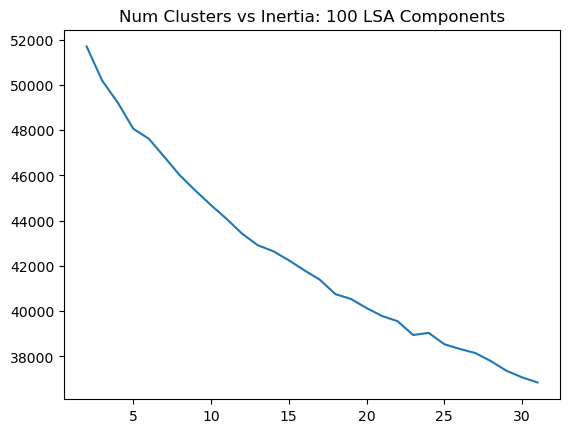

In [24]:
from matplotlib import pyplot as plt

plt.plot(cluster_sizes, intertias)
plt.title("Num Clusters vs Inertia: 100 LSA Components")
plt.show()

# We can see that as we increase the number of components, the homogenity of our clusters decreases
# This makes it harder to determine how many clusters we should use. 
# So lets go with 10 components and a nice 10 clusters

In [83]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction import CountVectorizer

def plot_top_words_kmeans(data, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for cluster in data['cluster'].unique():
        members_of_cluster = data[data['cluster'] == cluster]
        vectorizer = CountVectorizer()
        counts = vectorizer.fit_transform(members_of_cluster['all'])

        top_feautues = vectorizer.get_feature_names_out()
        top_features = top_features[0: n_top_words]
        weights = counts.toarray().sum(axis=0)[0: n_top_words]

        ax = axes[cluster]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {cluster +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

ImportError: cannot import name 'CountVectorizer' from 'sklearn.feature_extraction' (/Users/ellington/opt/anaconda3/envs/mlds-deepfake-prediction/lib/python3.10/site-packages/sklearn/feature_extraction/__init__.py)

Testing LSA clustering model on various cluster sizes


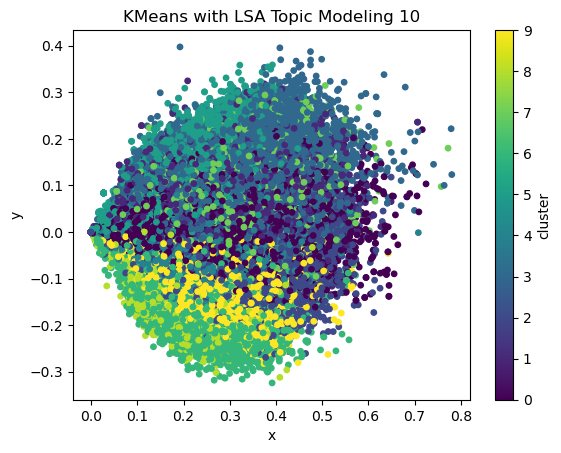

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Our best topic modeling with LSA
print("Testing LSA clustering model on various cluster sizes")
dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)

lsa = make_pipeline(TruncatedSVD(n_components=10), Normalizer(copy=False))
data = lsa.fit_transform(X_tfidf)

kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto')
clusters = kmeans.fit_predict(data)

graphing_lsa = TruncatedSVD(n_components=2)
df2d_kmeans_10 = pd.DataFrame(graphing_lsa.fit_transform(X_tfidf), columns=list('xy'))
df2d_kmeans_10['label'] = df_no_stop_word_removal['label']
df2d_kmeans_10['cluster'] = clusters

from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

df2d_kmeans_10.plot.scatter(x='x', y='y', c='cluster',cmap="viridis", s=15)
plt.title("KMeans with LSA Topic Modeling 10")
plt.show()

In [82]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
dataset = df_no_stop_word_removal['all']
vectorizer = TfidfVectorizer(min_df=.01, max_df=.75)
X_tfidf = vectorizer.fit_transform(dataset)
init = "nndsvda"

mbnmf_2 = MiniBatchNMF(
    n_components=10,
    random_state=1,
    batch_size=128,
    init=init,
    beta_loss="kullback-leibler",
    l1_ratio=0.5,
)

estimations_nmf_10 = mbnmf_2.fit_transform(X_tfidf)

graphing_lsa = TruncatedSVD(n_components=2)
df2d_nmf_10 = pd.DataFrame(graphing_lsa.fit_transform(X_tfidf), columns=list('xy'))
df2d_nmf_10['cluster'] = np.argmax(estimations_nmf_10, axis=1)

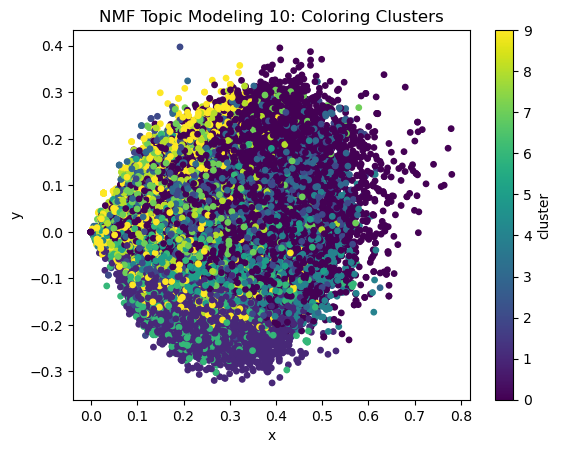

In [74]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

df2d_nmf_10.plot.scatter(x='x', y='y', c='cluster',cmap="viridis", s=15)
plt.title("NMF Topic Modeling 10: Coloring Clusters")
plt.show()

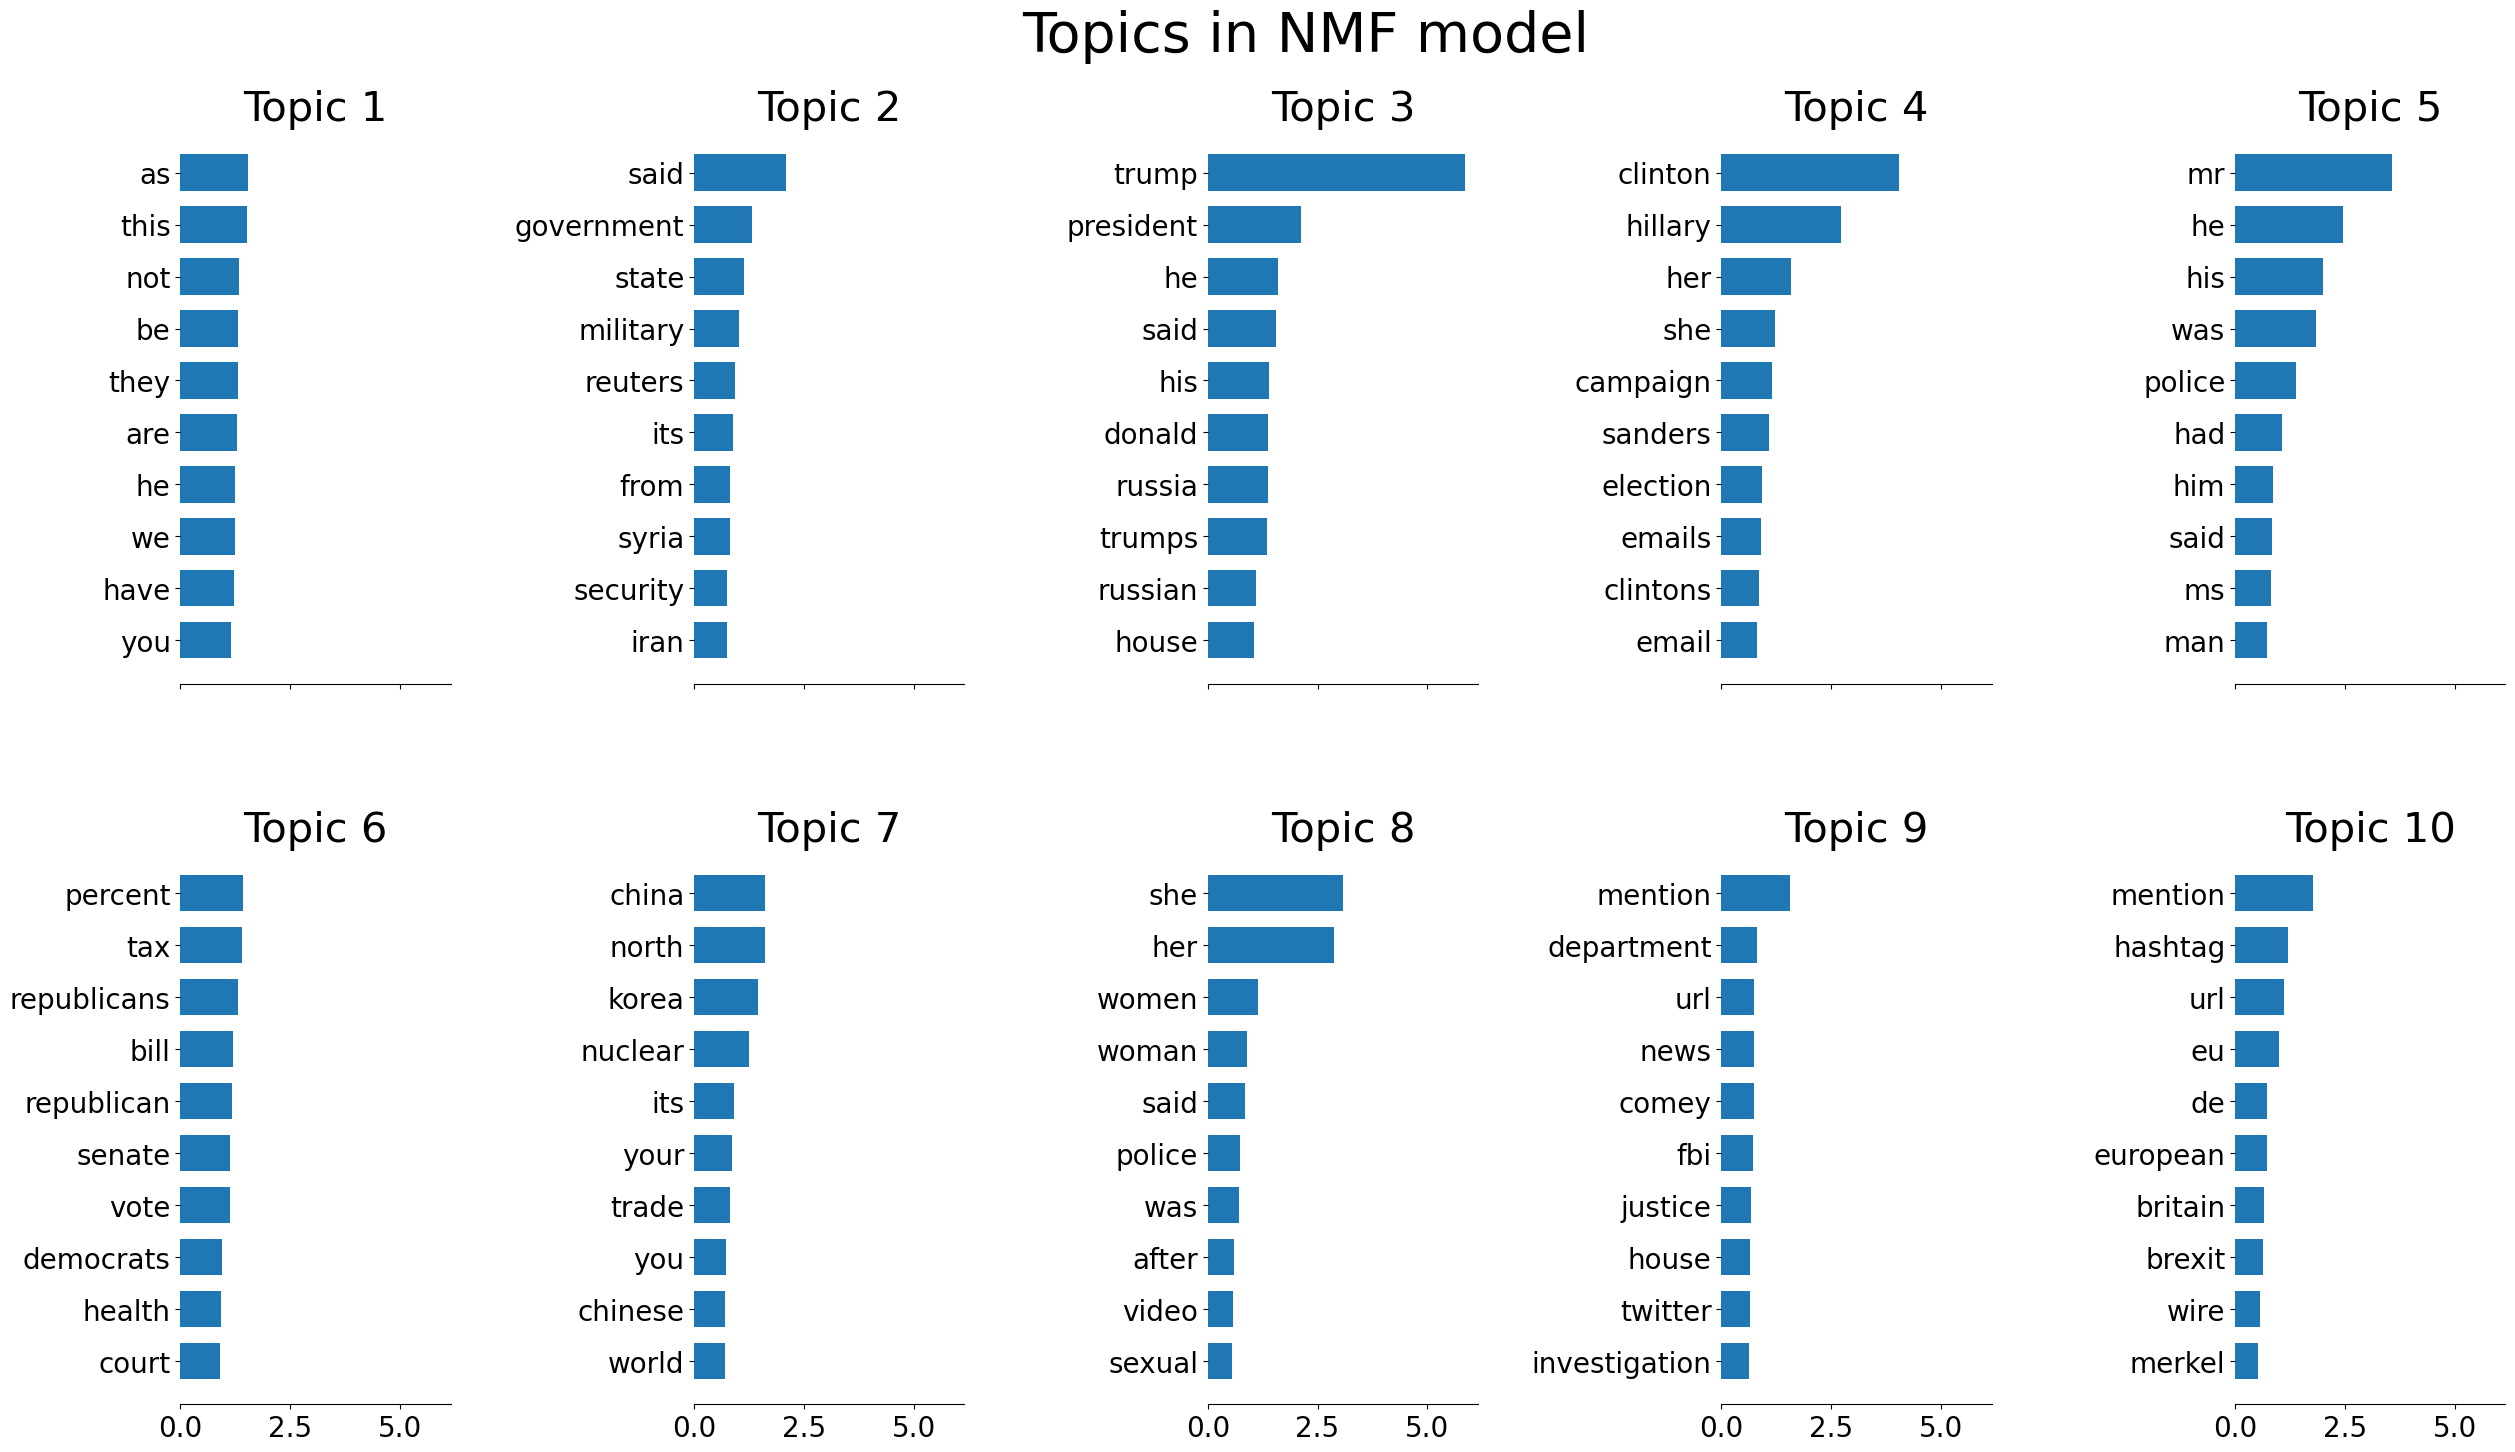

In [81]:
plot_top_words(
    mbnmf_2, vectorizer.get_feature_names_out(), 10, "Topics in NMF model"
)

In [71]:
# Now that we have determined that 10 Clusters is our best performing topic modeling, 
# Lets test other clustering methods 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

dataset = df_no_stop_word_removal['all']
count_vectorizer = CountVectorizer(min_df=.01, max_df=.75)
X_counts = count_vectorizer.fit_transform(dataset)

lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

estimations_lda_10 = lda.fit_transform(X_counts)

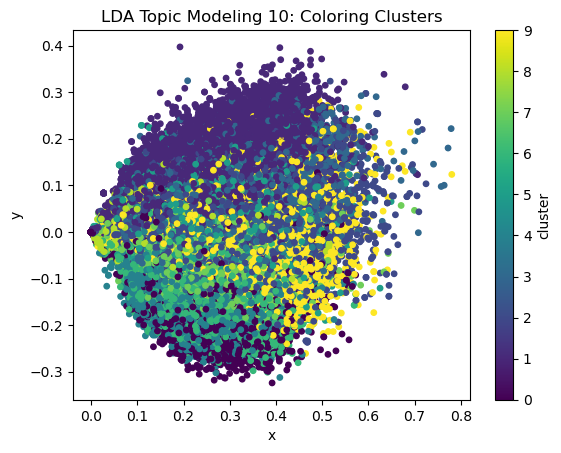

In [80]:
graphing_lsa = TruncatedSVD(n_components=2)
df2d_lda_10_topics = pd.DataFrame(graphing_lsa.fit_transform(X_tfidf), columns=list('xy'))
df2d_lda_10_topics['cluster'] = np.argmax(estimations_lda_10, axis=1)
df2d_lda_10_topics.plot.scatter(x='x', y='y', c='cluster',cmap="viridis", s=15)
plt.title("LDA Topic Modeling 10: Coloring Clusters")
plt.show()

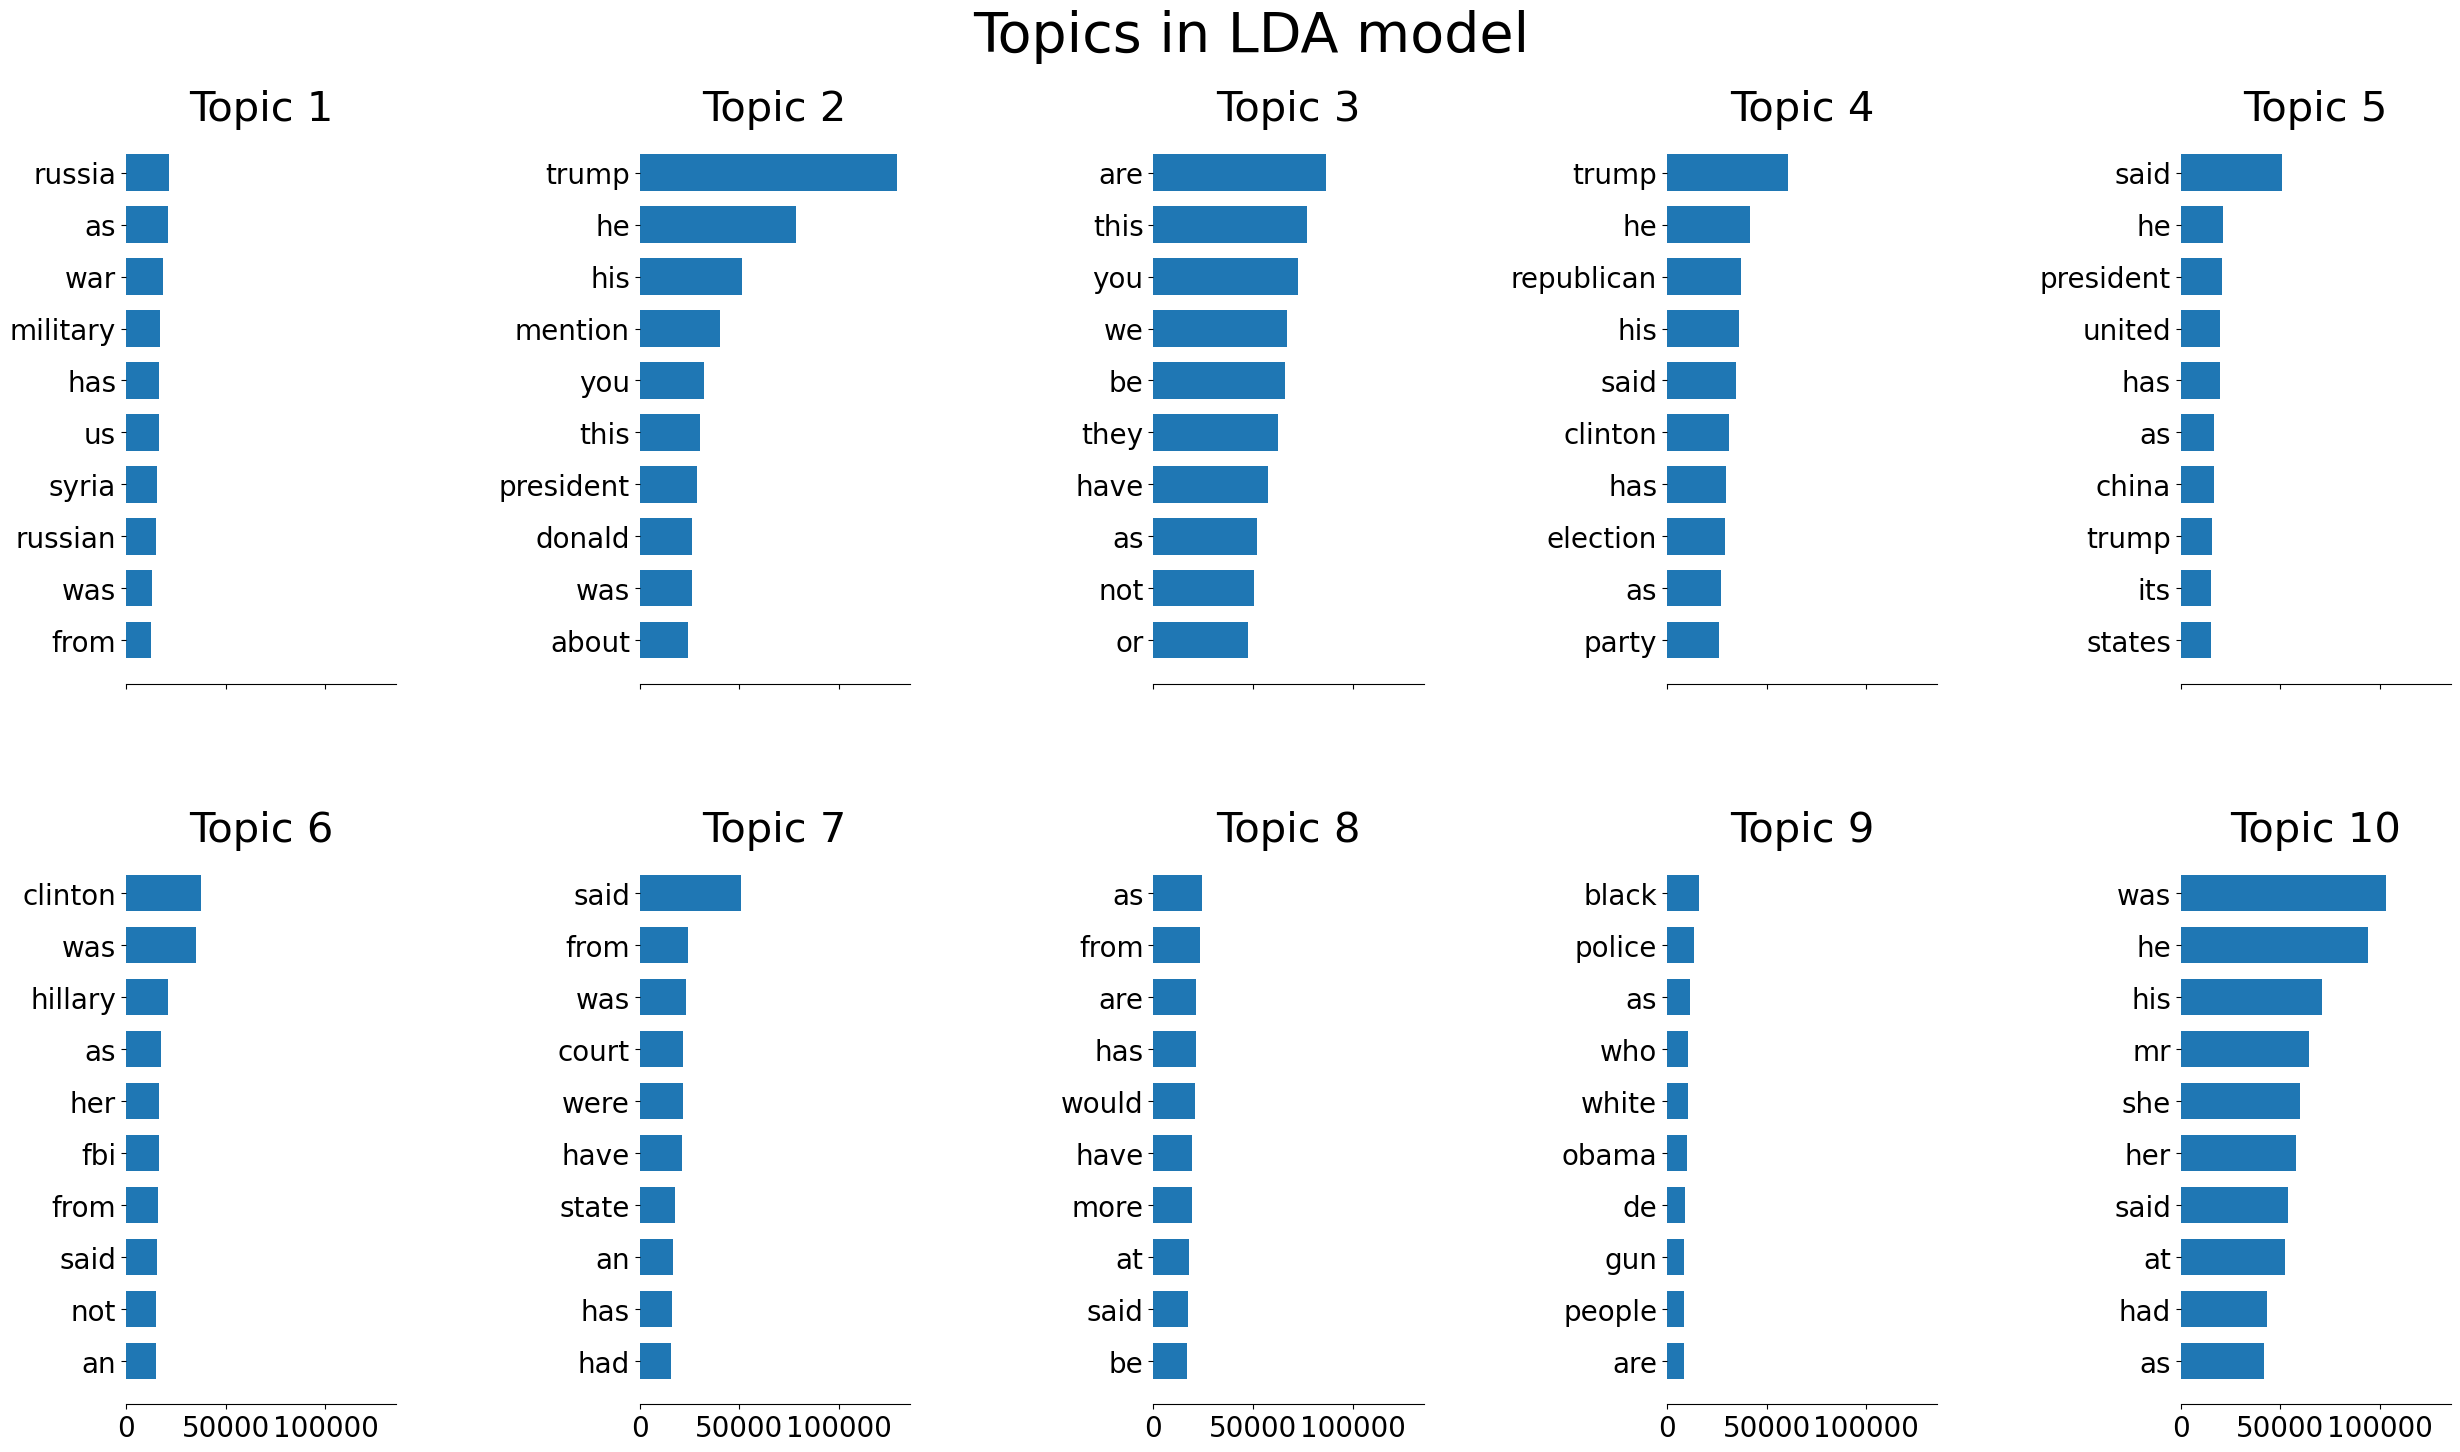

In [79]:
plot_top_words(
    lda, count_vectorizer.get_feature_names_out(), 10, "Topics in LDA model"
)